## BBM 409 - Programming Assignment 2

* You can add as many cells as you want in-between each question.
* Please add comments to your code to explain your work.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text. You can, however, refer to the outputs of code cells without adding them as images to the Markdown cell unless you are requested to do otherwise.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance. That is, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so.
* This document is also your report. Show your work.

###  Insert personal information (name, surname, student id)

*   Durmuş Selim Özçelik
*   2220356116



## 1. Weather Classification for Ankara

### 1.1. Introduction
* Brief overview of the classification task.
* Description of the dataset used for experiment.

In this section, we will employ softmax regression to forecast the weather using daily meteorological data from Ankara. The dataset used in this study includes daily weather details from 1975 to 2024. The weather dataset can be accessed from the provided file (ankara weather condition dataset.csv). This dataset comprises 17617 weather data entries. The classes in the dataset are categorical data (column: weathercondition). The categorical classes are as follows: • Class 1: Partly Cloudy • Class 2: Rainy • Class 3: Clear skies • Class 4: Cloudy • Class 5: Snowy.

### 1.2. Data Loading and Exploration

In [94]:
## Import necessary libraries
import numpy as np
import pandas as pd

In [95]:
## Read the regression data and transform it into a Numpy array collection.
## (See pandas and numpy functions)
data = pd.read_csv('ankara_weather_condition_dataset.csv', sep=';')

In [96]:
data

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase,weathercondition
0,21.6,10.0,14.6,21.6,10.0,14.6,8.1,67.0,0.0,0.0,...,33.4,1005.1,72.3,11.4,NaN,NaN,NaN,NaN,0.78,partly-cloudy-day
1,19.6,11.1,15.0,19.6,11.1,15.0,8.1,65.4,0.0,0.0,...,126.0,1009.1,70.2,12.1,NaN,NaN,NaN,NaN,0.82,partly-cloudy-day
2,19.1,10.6,14.1,19.1,10.6,14.1,9.5,75.4,0.0,0.0,...,338.0,1012.8,67.7,12.7,NaN,NaN,NaN,NaN,0.85,partly-cloudy-day
3,19.6,7.1,13.6,19.6,7.1,13.6,8.3,72.1,0.0,0.0,...,145.4,1011.6,52.1,11.4,NaN,NaN,NaN,NaN,0.89,partly-cloudy-day
4,16.3,10.5,12.8,16.3,10.5,12.8,8.3,74.5,0.0,0.0,...,259.7,1007.4,88.7,11.8,NaN,NaN,NaN,NaN,0.93,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17612,0.7,-4.9,-2.4,-2.2,-9.5,-5.2,-5.9,77.7,0.0,0.0,...,275.6,1018.9,64.2,12.4,NaN,NaN,NaN,NaN,0.29,partly-cloudy-day
17613,-0.9,-6.8,-3.0,-1.2,-6.8,-4.4,-4.2,91.1,0.0,0.0,...,242.0,1019.0,87.8,8.1,NaN,NaN,NaN,NaN,0.32,partly-cloudy-day
17614,2.5,-2.0,-0.2,2.5,-3.4,-1.1,-1.7,89.3,0.0,0.0,...,239.2,1018.0,84.9,10.0,NaN,NaN,NaN,NaN,0.36,partly-cloudy-day
17615,2.6,-3.2,-0.7,1.4,-6.5,-2.9,-2.5,87.7,0.0,0.0,...,55.2,1012.0,81.9,7.1,NaN,NaN,NaN,NaN,0.39,partly-cloudy-day


In [97]:
## Explore the dataset (e.g., size, features, target variables, summary statistics).
## Check for any missing values and handle them if necessary.
print(f"Size of the dataset: {data.shape}")

Size of the dataset: (17617, 26)


In [98]:
print(f"Features in the dataset: {data.columns.tolist()}")

Features in the dataset: ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'moonphase', 'weathercondition']


In [99]:
print("Target variable: 'weathercondition'")

Target variable: 'weathercondition'


In [100]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
tempmax                 0
tempmin                 0
temp                    0
feelslikemax            0
feelslikemin            0
feelslike               0
dew                     0
humidity                0
precip                  0
precipprob              0
precipcover             0
preciptype          13230
snow                14269
snowdepth           13732
windgust            13665
windspeed               0
winddir                 5
sealevelpressure      807
cloudcover             78
visibility              0
solarradiation      12450
solarenergy         12450
uvindex             12450
severerisk          16811
moonphase               0
weathercondition        0
dtype: int64


When I check for missing values, I see that some values have a high number of missing values, while others have a number of missing values that can be compensated for.

I fill the values that can be compensated for by taking their averages.

In [101]:
data['cloudcover'].fillna(data['cloudcover'].mean(), inplace=True)
data['sealevelpressure'].fillna(data['sealevelpressure'].mean(), inplace=True)
data['winddir'].fillna(data['winddir'].mean(), inplace=True)

I drop the features that have a high number of missing values.

In [102]:
data = data.dropna(axis=1)

In [103]:
print(data.isnull().sum())

tempmax             0
tempmin             0
temp                0
feelslikemax        0
feelslikemin        0
feelslike           0
dew                 0
humidity            0
precip              0
precipprob          0
precipcover         0
windspeed           0
winddir             0
sealevelpressure    0
cloudcover          0
visibility          0
moonphase           0
weathercondition    0
dtype: int64


In [104]:
data

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,windspeed,winddir,sealevelpressure,cloudcover,visibility,moonphase,weathercondition
0,21.6,10.0,14.6,21.6,10.0,14.6,8.1,67.0,0.0,0.0,0.0,29.5,33.4,1005.1,72.3,11.4,0.78,partly-cloudy-day
1,19.6,11.1,15.0,19.6,11.1,15.0,8.1,65.4,0.0,0.0,0.0,20.4,126.0,1009.1,70.2,12.1,0.82,partly-cloudy-day
2,19.1,10.6,14.1,19.1,10.6,14.1,9.5,75.4,0.0,0.0,0.0,22.2,338.0,1012.8,67.7,12.7,0.85,partly-cloudy-day
3,19.6,7.1,13.6,19.6,7.1,13.6,8.3,72.1,0.0,0.0,0.0,29.6,145.4,1011.6,52.1,11.4,0.89,partly-cloudy-day
4,16.3,10.5,12.8,16.3,10.5,12.8,8.3,74.5,0.0,0.0,0.0,14.3,259.7,1007.4,88.7,11.8,0.93,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17612,0.7,-4.9,-2.4,-2.2,-9.5,-5.2,-5.9,77.7,0.0,0.0,0.0,20.4,275.6,1018.9,64.2,12.4,0.29,partly-cloudy-day
17613,-0.9,-6.8,-3.0,-1.2,-6.8,-4.4,-4.2,91.1,0.0,0.0,0.0,14.8,242.0,1019.0,87.8,8.1,0.32,partly-cloudy-day
17614,2.5,-2.0,-0.2,2.5,-3.4,-1.1,-1.7,89.3,0.0,0.0,0.0,11.8,239.2,1018.0,84.9,10.0,0.36,partly-cloudy-day
17615,2.6,-3.2,-0.7,1.4,-6.5,-2.9,-2.5,87.7,0.0,0.0,0.0,28.1,55.2,1012.0,81.9,7.1,0.39,partly-cloudy-day


In [105]:
X = data.drop('weathercondition', axis=1).values  # Features
y = data['weathercondition'].values               # Labels

I am collecting the feature names in a list to use later for graphical representation.






In [106]:
feature_names = data.columns.values

### 1.3. Data Preprocessing
* Explain the preprocessing steps taken and their rationale.

I choose the 80-20 ratio for the dataaset. The reason for choosing these ratio is to ensure that the model is trained with a sufficient amount of data (which provides better learning and generalization), and also to evaluate the performance of the model in a fair and reliable manner. If testing is done with very little data, the test results could be random and may not accurately reflect the true performance of the model. This ratio is not fixed and can vary, but generally, an 80-20 split is chosen.


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here, I felt the need to use OneHotEncoder because we are dealing with a multiclass problem. The reasons for this are that machine learning models work better with numerical values and the outputs in our dataset are multiclass and not numbers they are categorical data.

If I want to explain how OneHotEncoder works if the “weathercondition” feature has three unique values such as “partly-cloudy-day”, “clear-day”, “rain”, OneHotEncoder creates three new features representing these three values. In an instance where the “weathercondition” value is “partly-cloudy-day”, the “partly-cloudy-day” feature takes the value 1, while the “clear-day” and “rain” features take the value 0.

In [108]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Dense representation
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

### 1.4. Logistic Regression Model
* Implement logistic regression model.
* Explain the reason behind the application of logistic regression on this type of data.

I've implemented softmax regression here because we're dealing with multiclass problem. I choose softmax regression for several reasons:


1.   Softmax regression gives a probability distribution over the different classes.
2.   Unlike binary logistic regression, softmax regression can handle more than two classes directly, without having to resort to strategies like One-vs-All (OvA) or One-vs-One (OvO).
3. Softmax regression can be efficiently trained using methods like gradient descent, and it scales well to large datasets and high-dimensional feature spaces.



In [109]:
## Implement logistic regression model from scratch, using libraries like NumPy.
class SoftmaxRegression:
    def __init__(self, lr=0.01, num_iter=1000):
        self.lr = lr
        self.num_iter = num_iter
        self.accuracies = []

    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

    def fit(self, X, y):
      self.m, self.n = X.shape
      self.k = y.shape[1]  # number of classes is now the second dimension of y
      self.W = np.random.rand(self.n, self.k)
      self.b = np.zeros((1, self.k))
      self.y_encoded = y  # y is already one-hot encoded


      for i in range(self.num_iter):
        scores = np.dot(X, self.W) + self.b
        probs = self.softmax(scores)
        loss = (-1 / self.m) * np.sum(self.y_encoded * np.log(probs))
        dW = (-1 / self.m) * np.dot(X.T, (self.y_encoded - probs))
        db = (-1 / self.m) * np.sum(self.y_encoded - probs, axis=0)
        self.W -= self.lr * dW
        self.b -= self.lr * db


    def predict(self, X):
        scores = np.dot(X, self.W) + self.b
        probs = self.softmax(scores)
        return np.argmax(probs, axis=1)

    def get_params(self, deep=True):
        return {"lr": self.lr, "num_iter": self.num_iter}


Here, I am creating a table to compare the accuracies with different feature scaling and feature selection methods, and I am recording the results in the table using the accuracy metric. For feature scaling, I used standard scaler and minmax scaler. For selection, I used select k best and select from model. I also added the none parameter to compare the results without using any method.

In [110]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scaling_methods = [None, StandardScaler(), MinMaxScaler()]
feature_selection_methods = [None, SelectKBest(score_func=mutual_info_classif, k=2), SelectFromModel(RandomForestClassifier())]

results = pd.DataFrame(columns=['Scaling', 'Feature Selection', 'Accuracy'])

for scaling in scaling_methods:
    for feature_selection in feature_selection_methods:
        if scaling is not None:
            scaler = scaling
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test

        if feature_selection is not None:
            selector = feature_selection
            X_train_selected = selector.fit_transform(X_train_scaled, y_train)
            X_test_selected = selector.transform(X_test_scaled)
        else:
            X_train_selected = X_train_scaled
            X_test_selected = X_test_scaled

        model = SoftmaxRegression(lr=0.01, num_iter=1000)
        model.fit(X_train_selected, y_train_encoded)
        predictions = model.predict(X_test_selected)

        y_test_label = np.argmax(y_test_encoded, axis=1)
        accuracy = accuracy_score(y_test_label, predictions)

        new_row = pd.DataFrame({
        'Scaling': [scaling.__class__.__name__ if scaling is not None else 'None'],
        'Feature Selection': [feature_selection.__class__.__name__ if feature_selection is not None else 'None'],
        'Accuracy': [accuracy]
        })
        results = pd.concat([results, new_row], ignore_index=True)

print(results)


<ipython-input-109-50d0d6e90e3b>:9: RuntimeWarning: overflow encountered in exp
  return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
<ipython-input-109-50d0d6e90e3b>:9: RuntimeWarning: invalid value encountered in divide
  return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
<ipython-input-109-50d0d6e90e3b>:22: RuntimeWarning: divide by zero encountered in log
  loss = (-1 / self.m) * np.sum(self.y_encoded * np.log(probs))
<ipython-input-109-50d0d6e90e3b>:22: RuntimeWarning: invalid value encountered in multiply
  loss = (-1 / self.m) * np.sum(self.y_encoded * np.log(probs))


          Scaling Feature Selection  Accuracy
0            None              None  0.213394
1            None       SelectKBest  0.893303
2            None   SelectFromModel  0.889898
3  StandardScaler              None  0.907491
4  StandardScaler       SelectKBest  0.774120
5  StandardScaler   SelectFromModel  0.945233
6    MinMaxScaler              None  0.745460
7    MinMaxScaler       SelectKBest  0.529228
8    MinMaxScaler   SelectFromModel  0.744325


These warnings are related to numerical stability issues that can occur in the softmax function and the computation of the loss function. The issues we are encountering are likely due to the lack of feature scaling and feature selection.

From here, we can see that the best method for feature scaling appears to be StandardScaler. As for the feature selection methods, it's is possible that adjusting the number of iterations in the softmax regreession could lead to better results. Therefore it might be benefical to experiment with different numbers of iterations to see if this improves the performance of the softmax regression with different feature selection methods. But first  I will draw a graph to understand which value I should use to select the ‘k’ value at the most optimum level in the SelectKBest method.

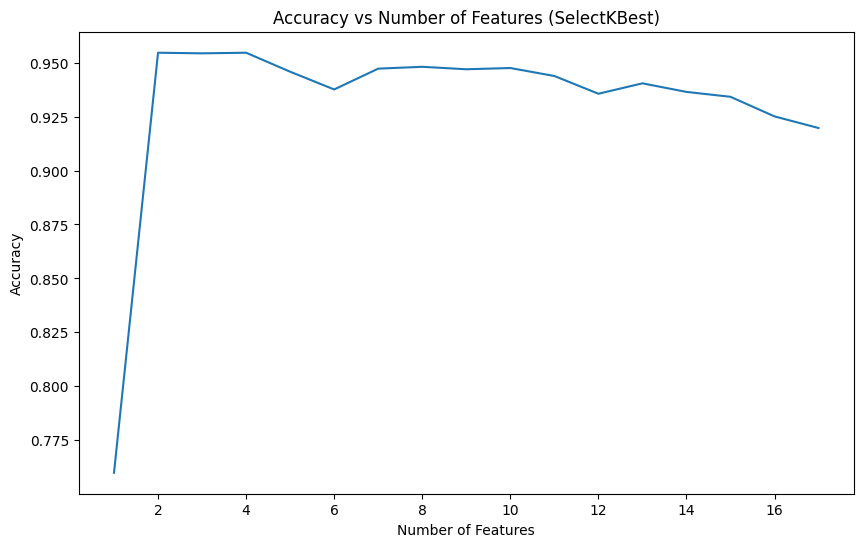

In [111]:
import matplotlib.pyplot as plt
feature_selection = SelectKBest(score_func=mutual_info_classif)
accuracies = []
for num_features in range(1, 18):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    selector = feature_selection
    selector.k = num_features
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    model = SoftmaxRegression(lr=0.01, num_iter=2000)
    model.fit(X_train_selected, y_train_encoded)
    predictions = model.predict(X_test_selected)

    y_test_label = np.argmax(y_test_encoded, axis=1)
    accuracy = accuracy_score(y_test_label, predictions)
    accuracies.append(accuracy)

# Grafik oluşturun
plt.figure(figsize=(10, 6))
plt.plot(range(1, 18), accuracies)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Features (SelectKBest)')
plt.show()


It appears that selecting a value in the range of 2 to 4 seems to be the most optimal. Therefore, I am choosing 3 as the ‘k’ value.

I will visualize to understand the importance levels of features in another feature selection method I use, SelectFromModel.

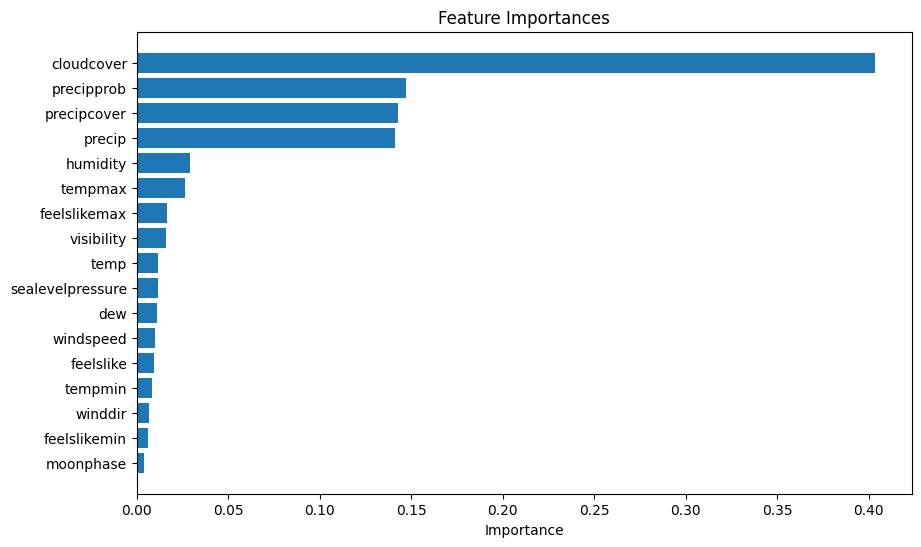

In [112]:
feature_selection = SelectFromModel(RandomForestClassifier(n_estimators=100))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

selector = feature_selection
selector.fit(X_train_scaled, y_train)

feature_importances = selector.estimator_.feature_importances_

sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(X_train_scaled.shape[1]), feature_importances[sorted_idx])
plt.yticks(range(X_train_scaled.shape[1]), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


  num_iter  Accuracy
0        1  0.011918
1      100  0.481271
2     1000  0.935868
3     2500  0.952894
4     5000  0.950908
5    10000  0.950341


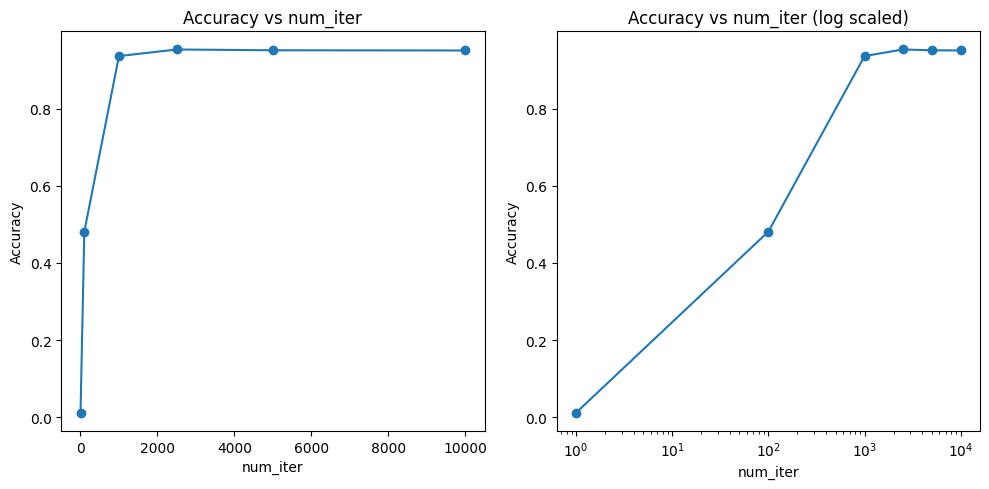

In [113]:
num_iters = [1, 100, 1000, 2500, 5000, 10000]

results_iter = pd.DataFrame(columns=['num_iter', 'Accuracy'])

for num_iter in num_iters:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    selector = SelectKBest(score_func=mutual_info_classif, k=3)
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    model = SoftmaxRegression(lr=0.01, num_iter=num_iter)
    model.fit(X_train_selected, y_train_encoded)
    predictions = model.predict(X_test_selected)

    y_test_label = np.argmax(y_test_encoded, axis=1)
    accuracy = accuracy_score(y_test_label, predictions)

    new_row = pd.DataFrame({
    'num_iter': [num_iter],
    'Accuracy': [accuracy]
    })
    results_iter = pd.concat([results_iter, new_row], ignore_index=True)

print(results_iter)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(results_iter['num_iter'], results_iter['Accuracy'], marker='o')
plt.title('Accuracy vs num_iter')
plt.xlabel('num_iter')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(results_iter['num_iter'], results_iter['Accuracy'], marker='o')
plt.xscale('log')
plt.title('Accuracy vs num_iter (log scaled)')
plt.xlabel('num_iter')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


  num_iter  Accuracy
0        1  0.130817
1      100  0.744041
2     1000  0.944098
3     2500  0.953178
4     5000  0.951759
5    10000  0.950624


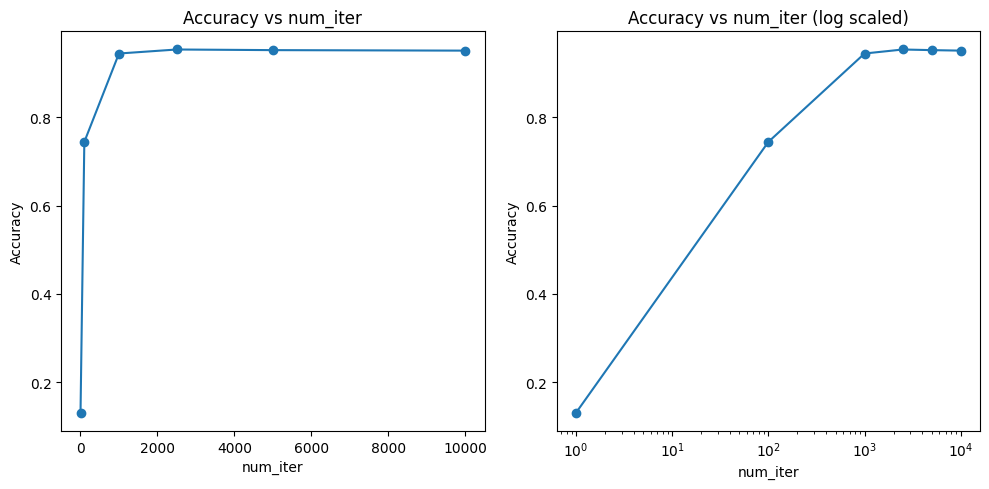

In [114]:

num_iters = [1, 100, 1000, 2500, 5000, 10000]

results_iter = pd.DataFrame(columns=['num_iter', 'Accuracy'])

for num_iter in num_iters:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    selector = SelectFromModel(RandomForestClassifier())
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    X_test_selected = selector.transform(X_test_scaled)

    model = SoftmaxRegression(lr=0.01, num_iter=num_iter)
    model.fit(X_train_selected, y_train_encoded)
    predictions = model.predict(X_test_selected)

    y_test_label = np.argmax(y_test_encoded, axis=1)
    accuracy = accuracy_score(y_test_label, predictions)

    new_row = pd.DataFrame({
    'num_iter': [num_iter],
    'Accuracy': [accuracy]
    })
    results_iter = pd.concat([results_iter, new_row], ignore_index=True)

print(results_iter)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(results_iter['num_iter'], results_iter['Accuracy'], marker='o')
plt.title('Accuracy vs num_iter')
plt.xlabel('num_iter')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(results_iter['num_iter'], results_iter['Accuracy'], marker='o')
plt.xscale('log')
plt.title('Accuracy vs num_iter (log scaled)')
plt.xlabel('num_iter')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


When I compare the results above, I see that the best result is obtained with SelectFromModel and StandardScaler at 2500 iterations. I believe these will be the most accurate choices for the model.

In [117]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

selector = SelectFromModel(RandomForestClassifier())
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

model = SoftmaxRegression(lr=0.01, num_iter=2500)
model.fit(X_train_selected, y_train_encoded)
predictions = model.predict(X_test_selected)
y_test_label = np.argmax(y_test_encoded, axis=1)
accuracy = accuracy_score(y_test_label, predictions)
print(accuracy)

0.9531782065834279


## 2. DDoS Attack Classification

### 2.1. Introduction
* Brief overview of the classification task.
* Description of the dataset used for classification analysis.

In this segment, we will use the logistic regression technique to classify DDoS attacks. The dataset for this study consists of network traffic that has been categorized as either malicious or benign.

The DDoS dataset can be accessed from the provided file (ddos dataset.csv). This dataset includes 103439 network traffic data entries. The DDoS dataset is a binary class dataset, where 1 signifies malicious and 0 signifies benign (column: label).

### 2.2. Data Loading and Exploration

In [118]:
## Import necessary libraries
import numpy as np
import pandas as pd


In [119]:
## Read the classification data and transform it into a Numpy array collection.
## (See pandas and numpy functions)
data = pd.read_csv('ddos_dataset.csv')

I am collecting the feature names in a list to use later for graphical representation.


In [120]:
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103434,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
103435,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
103436,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
103437,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [121]:
data.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


When I checked the dataset, I saw that not every data was in float or int format. These are src, dst, and protocol. I need to convert these to numerical values using label encoder.

In [122]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
data['Protocol'] = enc.fit_transform(data['Protocol'])
data['src'] = enc.fit_transform(data['src'])
data['dst'] = enc.fit_transform(data['dst'])

In [123]:
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,0,16,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,2,3,143928631,3917,0,0.0,0.0,0
1,11605,1,0,16,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,2,4,3842,3520,0,0.0,0.0,0
2,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,1,3795,1242,0,0.0,0.0,0
3,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,2,3688,1492,0,0.0,0.0,0
4,11425,1,10,16,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,2,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103434,5262,3,14,15,79,7742,81,842000000,8.184200e+10,5,...,0,0,0,1,15209,12720,1,1.0,2.0,0
103435,5262,3,14,15,79,7742,81,842000000,8.184200e+10,5,...,0,0,0,3,15099,14693,1,1.0,2.0,0
103436,5262,3,2,13,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,2,3409,3731,0,0.0,0.0,0
103437,5262,3,2,13,31,3038,31,805000000,3.180500e+10,5,...,1,0,0,1,15209,12720,1,1.0,2.0,0


I am checking for potential outliers in the dataset because I suspect there might be some.



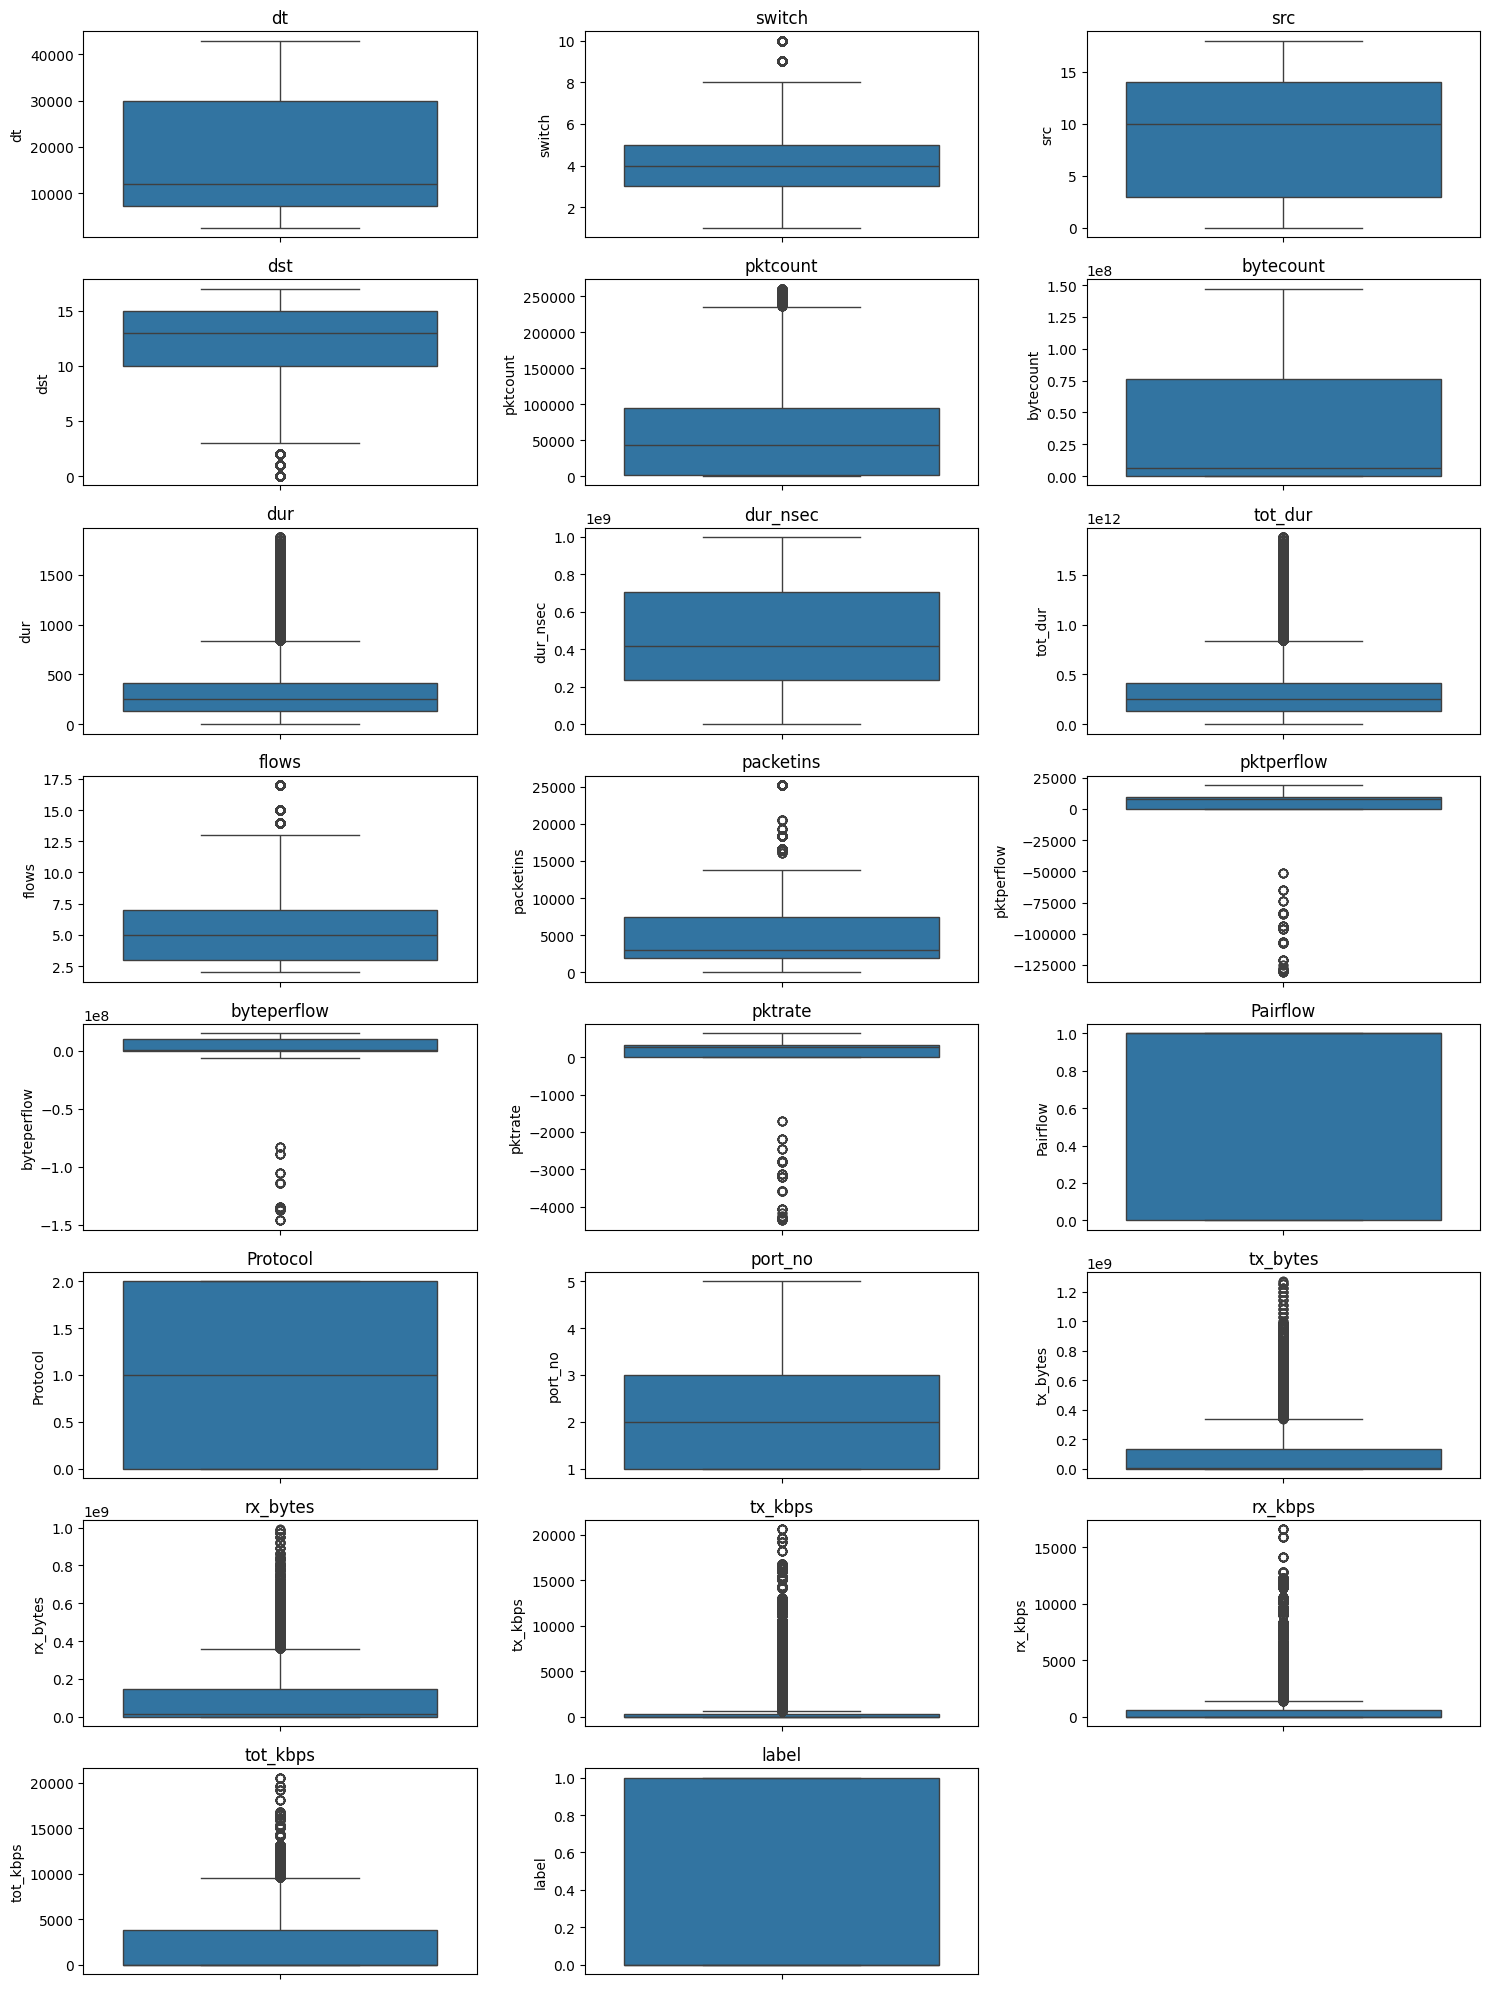

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setiniz 'df' olarak adlandırılmıştır
features = data.columns

plt.figure(figsize=(15,20))
for i, feature in enumerate(features):
    plt.subplot(len(features)//3 + 1, 3, i+1)
    sns.boxplot(data=data, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

I am eliminating outliers using the IQR method and then checking the graphs again.





In [125]:
features = ['pktcount', 'switch', 'dst', 'dur', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps']
for feature in features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[feature] >= lower_bound ) | (data[feature] <= upper_bound)]

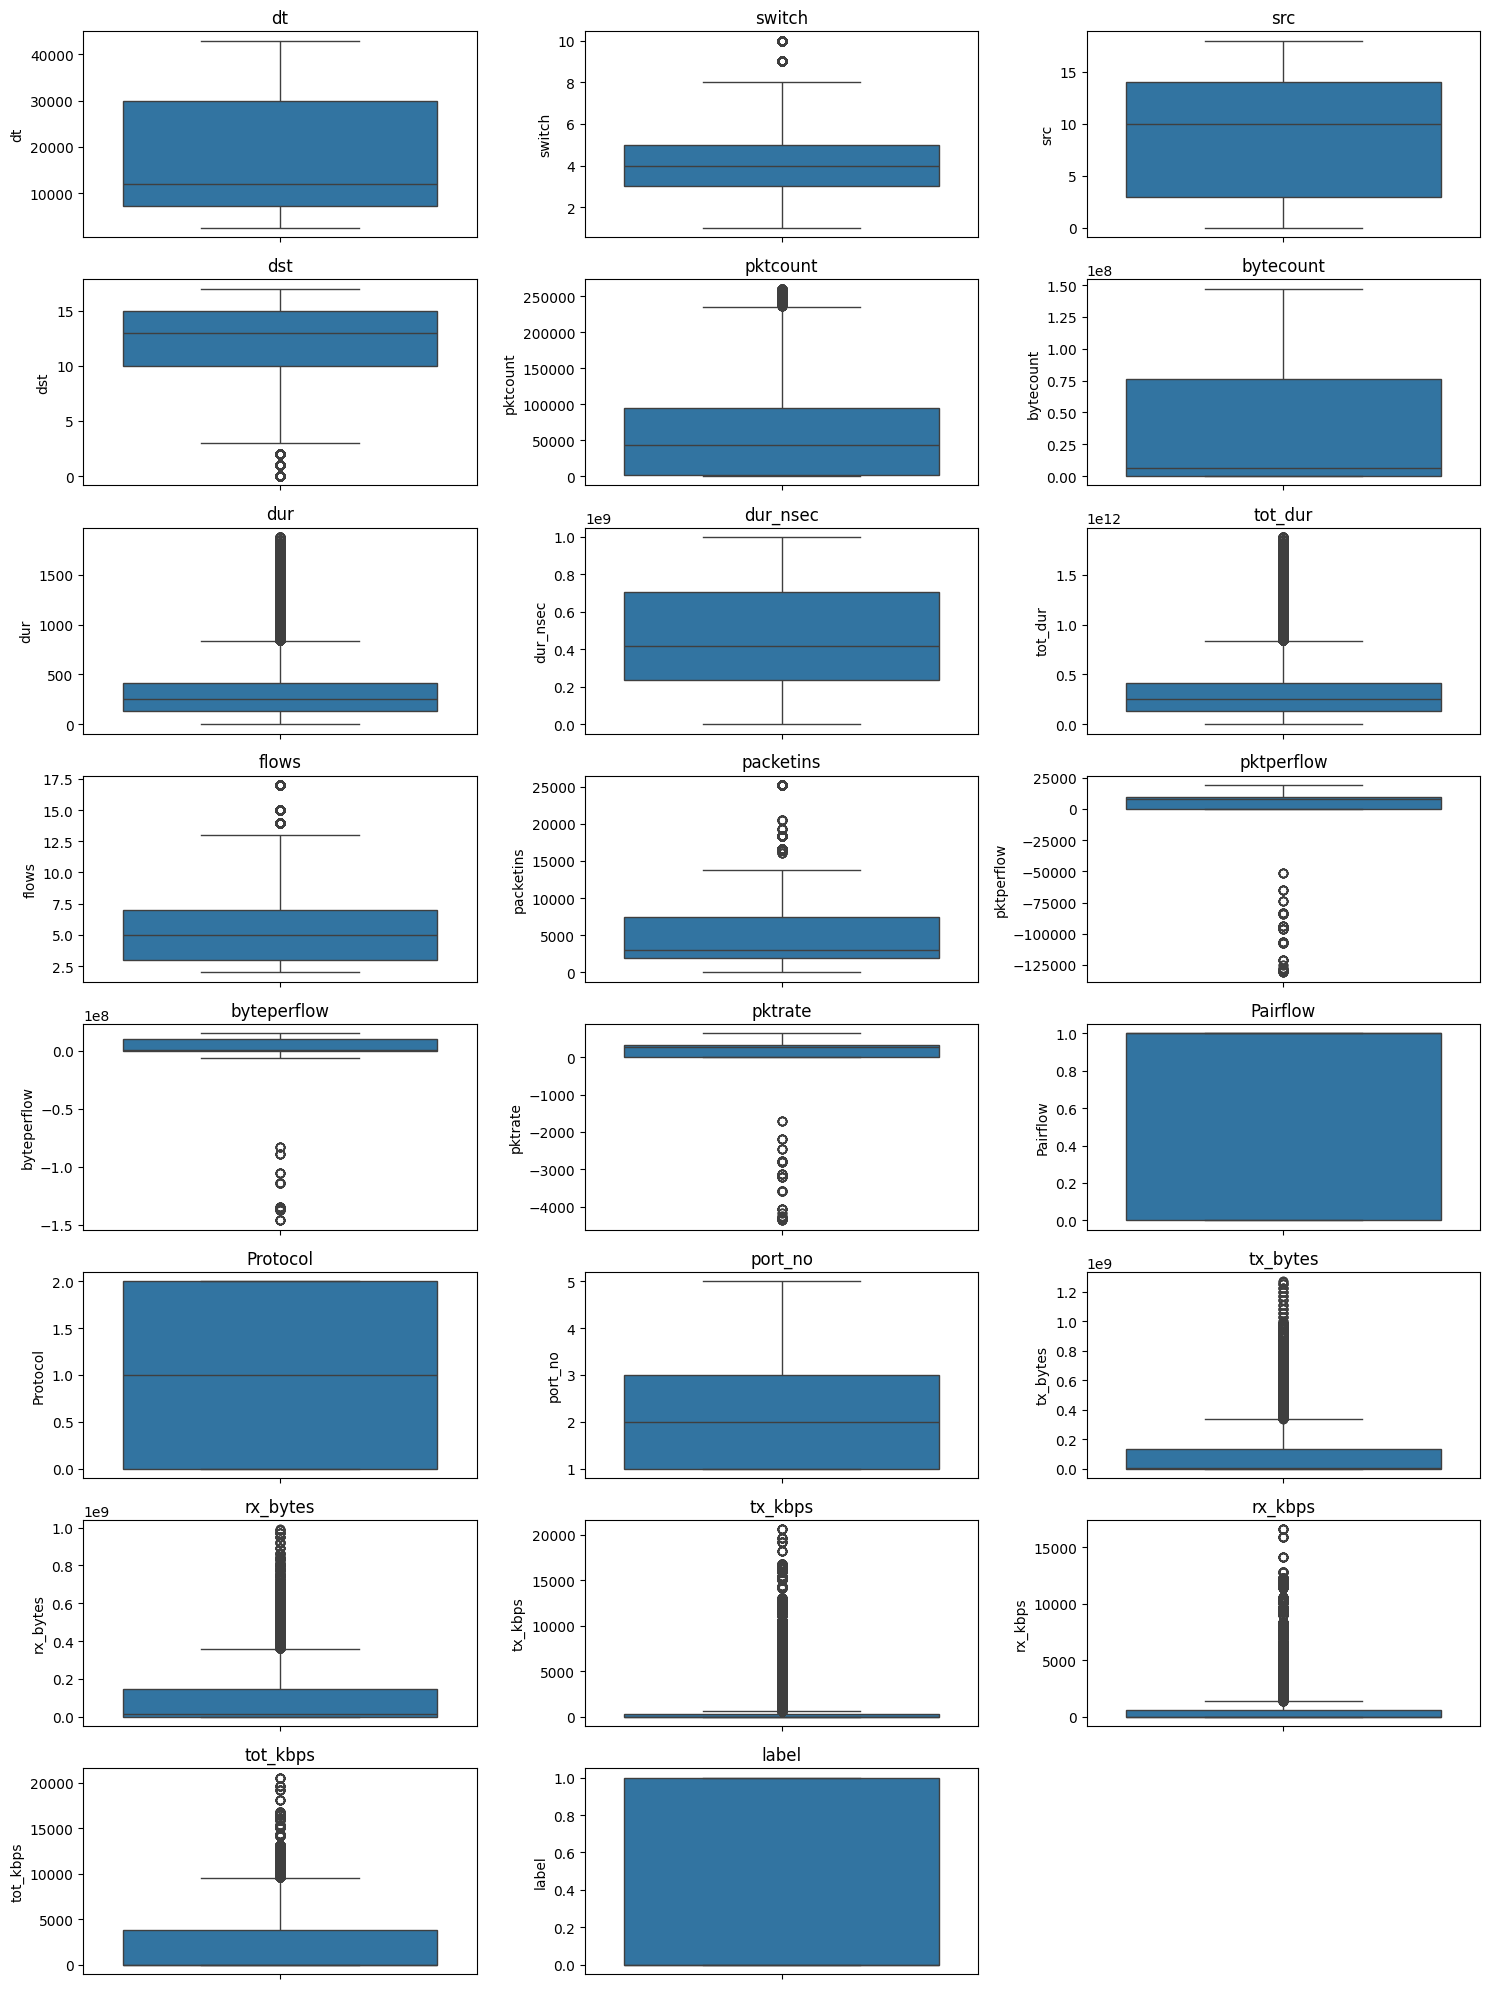

In [126]:
features = data.columns

plt.figure(figsize=(15,20))
for i, feature in enumerate(features):
    plt.subplot(len(features)//3 + 1, 3, i+1)
    sns.boxplot(data=data, y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [127]:
print(f"Size of the dataset: {data.shape}")

Size of the dataset: (103439, 23)


In [128]:
print(f"Features in the dataset: {data.columns.tolist()}")

Features in the dataset: ['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label']


In [129]:
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

Missing values in each column:
dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64


I removed the index column because I thought it would not positively affect the performance of the model.






In [130]:
data = data.drop(columns=['dt'])

I am collecting the feature names in a list to use later for graphical representation.


In [131]:
feature_names = data.columns.values

In [132]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

There is no missing value. So i directly split with 80-20 ratio. I choose the 80-20 ratio for the dataaset. The reason for choosing these ratio is to ensure that the model is trained with a sufficient amount of data (which provides better learning and generalization), and also to evaluate the performance of the model in a fair and reliable manner. If testing is done with very little data, the test results could be random and may not accurately reflect the true performance of the model. This ratio is not fixed and can vary, but generally, an 80-20 split is chosen.

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.4. Logistic Regression Model
* Implement logistic regression model.
* Explain the reason behind the application of logistic regression on this type of data.

When we look at the outputs in our dataset, we see that they are binary. Therefore, I think logistic regression is the most suitable model for binary problems. You can understand the reasons for using logistic regression for binary problems from the following reasons.



1.    Logistic regression is less computationally intensive compared to other classification algorithms like Support Vector Machines (SVM) or Random Forests when the number of features is large, making it a more efficient model.
2.   Logistic regression is robust to noise and it can avoid overfitting.
3. Logistic regression does not require tuning, unlike other techniques such as SVM or Decision Trees where we need to adjust parameters.



In [134]:
## Implement logistic regression model from scratch, using libraries like NumPy.
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights, self.bias = None, None

    def fit(self, X, y):
        # Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = 1 / (1 + np.exp(-linear_model))

            dw = (1 / len(X)) * np.dot(X.T, (y_predicted - y))
            db = (1 / len(X)) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return 1 / (1 + np.exp(-linear_model))

    def predict(self, X):
        probabilities = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in probabilities]

Here, I am creating a table to compare the accuracies with different feature scaling and feature selection methods, and I am recording the results in the table using the accuracy metric. For feature scaling, I used standard scaler and minmax scaler. For selection, I used select k best and select from model. I also added the none parameter to compare the results without using any method.

In [135]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scaling_methods = [None, StandardScaler(), MinMaxScaler()]
feature_selection_methods = [None, SelectKBest(score_func=mutual_info_classif, k=10), SelectFromModel(RandomForestClassifier())]

results = []

for scaling in scaling_methods:
    for feature_selection in feature_selection_methods:
        # Copy the data
        X_copy = np.copy(X)

        # Apply scaling if not None
        if scaling is not None:
            X_copy = scaling.fit_transform(X_copy)
            X_copy = np.array(X_copy)  # Convert X_copy to a numpy array

        # Apply feature selection if not None
        if feature_selection is not None:
            X_copy = feature_selection.fit_transform(X_copy, y)
            X_copy = np.array(X_copy)  # Convert X_copy to a numpy array

        # Splitting the dataset into the Training set and Test set
        X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size = 0.2, random_state = 0)

        # Train the model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Test the model
        y_test_predicted = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_test_predicted)

        # Save the results
        results.append({
            'scaling_method': scaling.__class__.__name__ if scaling else 'None',
            'feature_selection_method': feature_selection.__class__.__name__ if feature_selection else 'None',
            'accuracy': accuracy
        })

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

<ipython-input-134-71f0dc0fa3b2>:16: RuntimeWarning: overflow encountered in exp
  y_predicted = 1 / (1 + np.exp(-linear_model))
<ipython-input-134-71f0dc0fa3b2>:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-linear_model))
<ipython-input-134-71f0dc0fa3b2>:16: RuntimeWarning: overflow encountered in exp
  y_predicted = 1 / (1 + np.exp(-linear_model))
<ipython-input-134-71f0dc0fa3b2>:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-linear_model))
<ipython-input-134-71f0dc0fa3b2>:16: RuntimeWarning: overflow encountered in exp
  y_predicted = 1 / (1 + np.exp(-linear_model))
<ipython-input-134-71f0dc0fa3b2>:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-linear_model))


   scaling_method feature_selection_method  accuracy
0            None                     None  0.612916
1            None              SelectKBest  0.612916
2            None          SelectFromModel  0.577436
3  StandardScaler                     None  0.717614
4  StandardScaler              SelectKBest  0.711282
5  StandardScaler          SelectFromModel  0.709590
6    MinMaxScaler                     None  0.631574
7    MinMaxScaler              SelectKBest  0.612722
8    MinMaxScaler          SelectFromModel  0.612722


These warnings are related to numerical stability issues that can occur in the logistic regression function and the computation of the loss function. The issues we are encountering are likely due to the lack of feature scaling and feature selection.

From here, we can see that the best method for feature scaling appears to be StandardScaler. As for the feature selection methods, it's is possible that adjusting the number of iterations in the logistic regreession could lead to better results. Therefore it might be benefical to experiment with different numbers of iterations to see if this improves the performance of the logistic regression with different feature selection methods. But first  I will draw a graph to understand which value I should use to select the ‘k’ value at the most optimum level in the SelectKBest method.

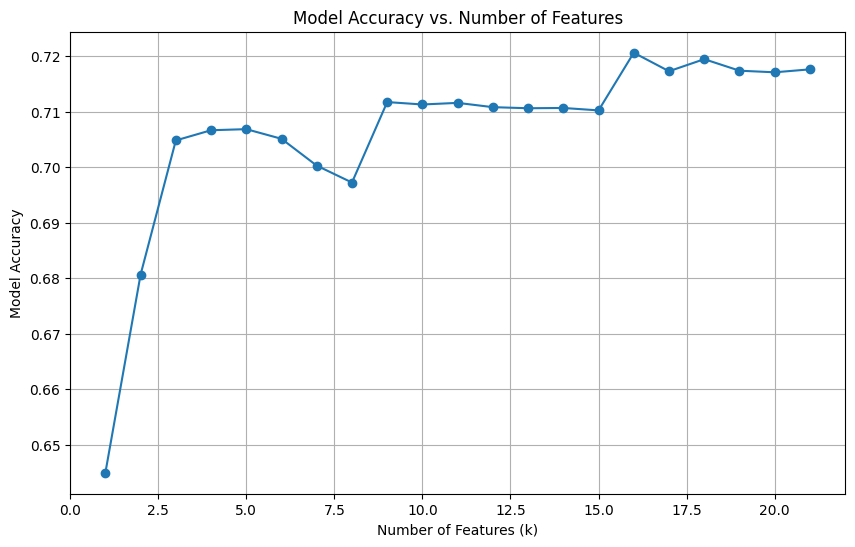

In [136]:
import matplotlib.pyplot as plt

# Define the range of features to test
k_values = range(1, 22)

# Initialize a list to store results
k_results = []

# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Loop over the k_values
for k in k_values:
    # Apply feature selection
    feature_selection = SelectKBest(score_func=mutual_info_classif, k=k)
    X_copy = feature_selection.fit_transform(X_scaled, y)

    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size = 0.2, random_state = 0)

    # Train the model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Test the model
    y_test_predicted = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_test_predicted)

    # Save the results
    k_results.append(accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_results, marker='o')
plt.title('Model Accuracy vs. Number of Features')
plt.xlabel('Number of Features (k)')
plt.ylabel('Model Accuracy')
plt.grid(True)
plt.show()


It appears that selecting a value in the range of 15 to 17 seems to be the most optimal. Therefore, I am choosing 16 as the ‘k’ value.

I will visualize to understand the importance levels of features in another feature selection method I use, SelectFromModel.

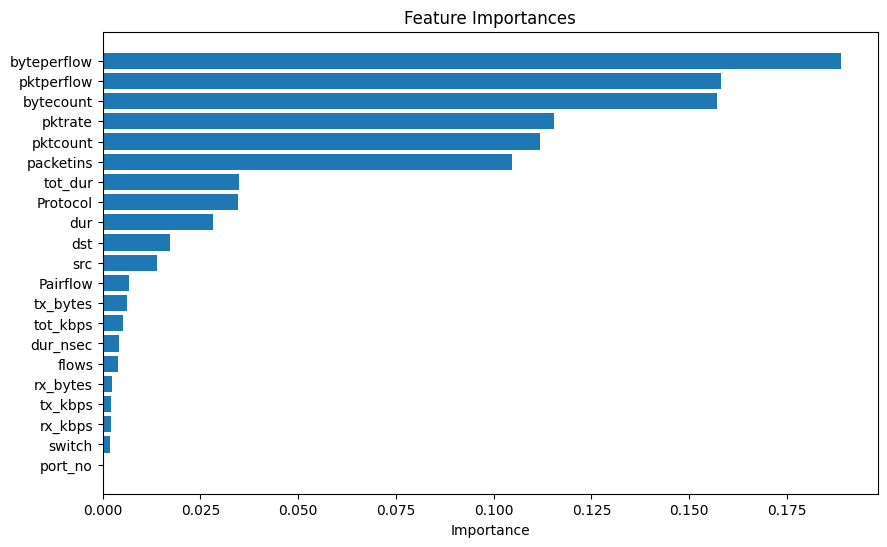

In [137]:
# Apply scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model to get feature importances
model = RandomForestClassifier(n_estimators=100)
model.fit(X_scaled, y)

# Get feature importances
feature_importances = model.feature_importances_

# Get the indices of the features sorted by importance
sorted_idx = np.argsort(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X.shape[1]), feature_importances[sorted_idx])
plt.yticks(range(X.shape[1]), [feature_names[i] for i in sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


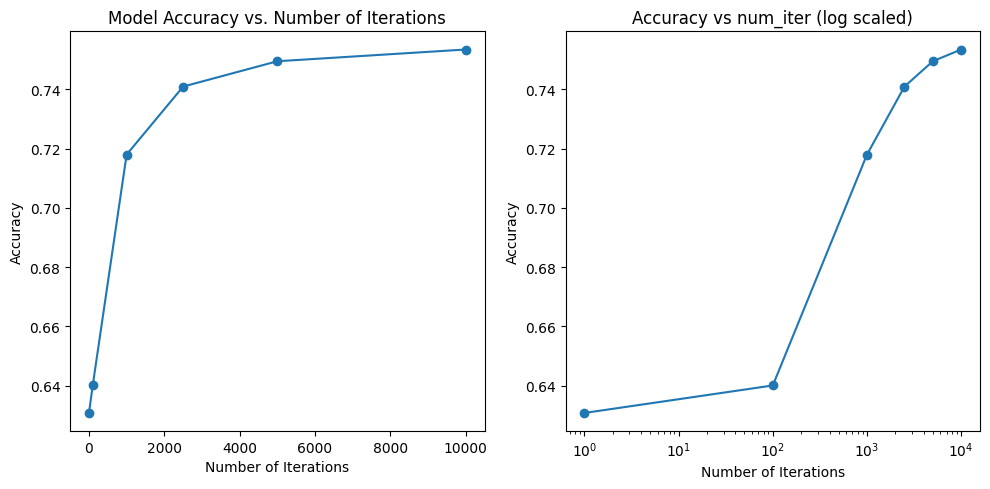

In [138]:
# Your iteration numbers
num_iters = [1, 100, 1000, 2500, 5000, 10000]

# Initialize the list to store accuracies
accuracies = []

# Initialize StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectKBest
selector = SelectKBest(score_func=mutual_info_classif, k=16)

# Apply scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply feature selection
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Loop over your iteration numbers
for num_iter in num_iters:
    # Initialize your Logistic Regression model with the current number of iterations
    model = LogisticRegression(num_iterations=num_iter)

    # Fit the model
    model.fit(X_train_selected, y_train)

    # Predict the test set results
    y_pred = model.predict(X_test_selected)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the accuracies list
    accuracies.append(accuracy)

plt.figure(figsize=(10,5))

# Plot the results
plt.subplot(1, 2, 1)
plt.plot(num_iters, accuracies, marker='o')
plt.title('Model Accuracy vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(num_iters, accuracies, marker='o')
plt.xscale('log')
plt.title('Accuracy vs num_iter (log scaled)')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


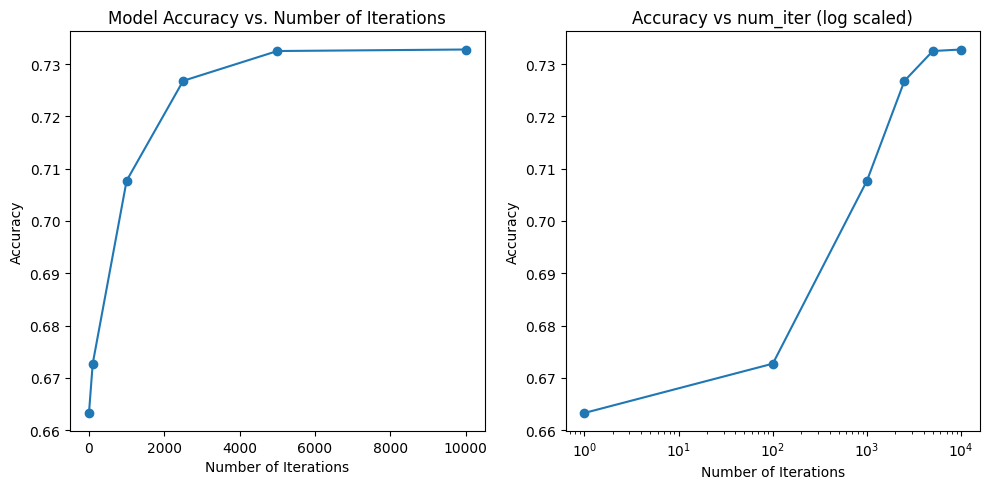

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Your iteration numbers
num_iters = [1, 100, 1000, 2500, 5000, 10000]

# Initialize the list to store accuracies
accuracies = []

# Initialize StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SelectFromModel with RandomForestClassifier
selector = SelectFromModel(RandomForestClassifier(n_estimators=100))

# Apply scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply feature selection
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Loop over your iteration numbers
for num_iter in num_iters:
    # Initialize your Logistic Regression model with the current number of iterations
    model = LogisticRegression(num_iterations=num_iter)

    # Fit the model
    model.fit(X_train_selected, y_train)

    # Predict the test set results
    y_pred = model.predict(X_test_selected)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append the accuracy to the accuracies list
    accuracies.append(accuracy)

plt.figure(figsize=(10,5))

# Plot the results
plt.subplot(1, 2, 1)
plt.plot(num_iters, accuracies, marker='o')
plt.title('Model Accuracy vs. Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(num_iters, accuracies, marker='o')
plt.xscale('log')
plt.title('Accuracy vs num_iter (log scaled)')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


When I compare the results above, I see that the best result is obtained with SelectKBest and StandardScaler at 10000 iterations. I believe these will be the most accurate choices for the model.

In [140]:
## Evaluate the model's performance on the training set by computing accuracy.
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=mutual_info_classif, k=16)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply feature selection
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
model = LogisticRegression(num_iterations=10000)

    # Fit the model
model.fit(X_train_selected, y_train)

    # Predict the test set results
y_pred = model.predict(X_test_selected)

    # Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7534802784222738
